In [51]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from dataclasses import dataclass
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv(r'data_center\IMDB Dataset.csv')
print(df.shape)
df.info()

(50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [61]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=25000)

In [62]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [63]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [64]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [65]:
def vectorize_sequences(sequences, dimension=25000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  #set specific indices of results[i] to 1s
    return results

In [66]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [74]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(25000,)),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',      # Surveille la perte sur validation
    patience=3,              # Arrête si pas d’amélioration après 3 epochs
    restore_best_weights=True # Restaure les poids du meilleur epoch
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.7419 - loss: 0.5188 - val_accuracy: 0.8862 - val_loss: 0.3006
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8930 - loss: 0.3187 - val_accuracy: 0.8881 - val_loss: 0.2988
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9034 - loss: 0.2785 - val_accuracy: 0.8872 - val_loss: 0.2973
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9150 - loss: 0.2482 - val_accuracy: 0.8858 - val_loss: 0.3113
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9184 - loss: 0.2385 - val_accuracy: 0.8866 - val_loss: 0.3151
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9245 - loss: 0.2325 - val_accuracy: 0.8785 - val_loss: 0.3274
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8859 - loss: 0.3009
Test accuracy: 0.89


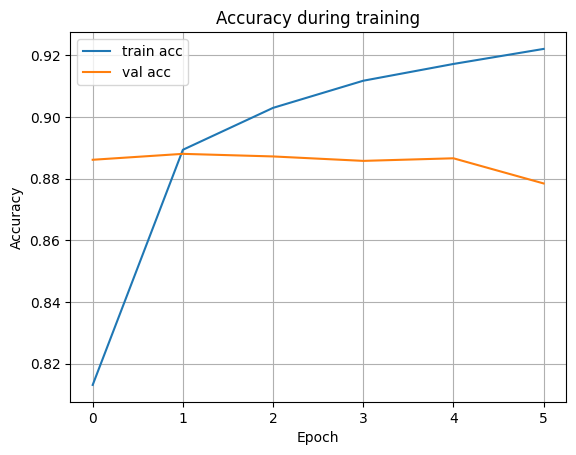

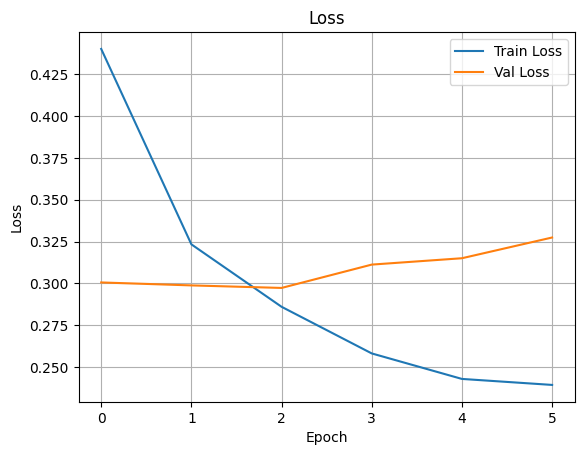

In [75]:
hist = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

# 6. Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

# 7. Plot training history
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


    Train the model on the training data for 20 epochs with a batch size of 512.
    Use the validation set to monitor performance during training.


In [76]:
model_fat = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(25000,)),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_fat.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 80ms/step - accuracy: 0.8112 - loss: 0.4164 - val_accuracy: 0.8793 - val_loss: 0.2925
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.9178 - loss: 0.2144 - val_accuracy: 0.8845 - val_loss: 0.2937
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.9403 - loss: 0.1712 - val_accuracy: 0.8777 - val_loss: 0.3232
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.9524 - loss: 0.1428 - val_accuracy: 0.8837 - val_loss: 0.3684
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8776 - loss: 0.2928
Test accuracy: 0.88


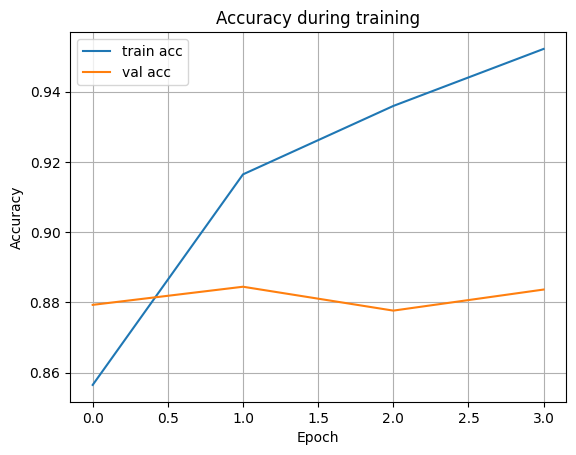

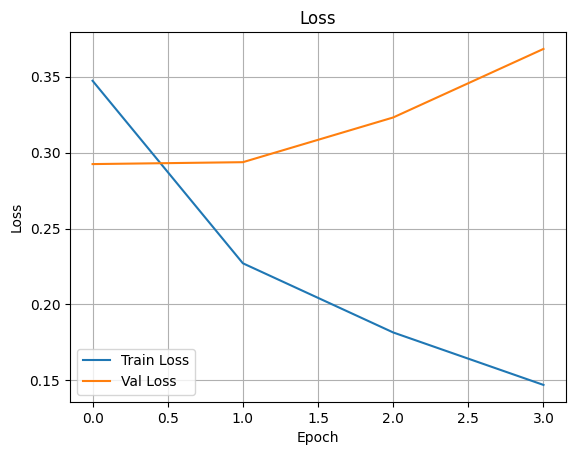

In [77]:
hist = model_fat.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

# 6. Evaluate the Model
loss, accuracy = model_fat.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

# 7. Plot training history
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

On observe sur les 2 cas que l'optimum est sur 1 epoch quelquesoit le nombre de neurones.
Donc il faudrait faire sur plus de données.
A partir de l'epoch 2
val_accuracy commence à diminuer et l'accuracy augmente : Signe d'overfitting


Par contre le nombre de neurone dans ce cas fait juste ralentir le traitement sans amélioration de l'accurency

In [57]:
# Vectorise test_data aussi
X_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype("float32")

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Final test accuracy: {accuracy:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8830 - loss: 0.3116
Final test accuracy: 0.88


Plutôt pas mal comme accurancy 